<a href="https://colab.research.google.com/github/villafue/Python_Statistics/blob/master/ab_test/tutorial/datacamp/Customer%20Analytics%20and%20AB%20Testing%20in%20Python/2%20Exploring%20and%20Visualizing%20Customer%20Behavior/2_Exploring_and_Visualizing_Customer_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring and Visualizing Customer Behavior

This chapter teaches you how to visualize, manipulate, and explore KPIs as they change over time. Through a variety of examples, you'll learn how to work with datetime objects to calculate metrics per unit time. Then we move to the techniques for how to graph different segments of data, and apply various smoothing functions to reveal hidden trends. Finally we walk through a complete example of how to pinpoint issues through exploratory data analysis of customer data. Throughout this chapter various functions are introduced and explained in a highly generalizable way.

# Working with time series data in pandas

Got It!
1. Working with time series data in pandas
Great job working through the mechanics of calculating KPIs. Those techniques will continue to be useful throughout the course.

2. Exploratory Data Analysis
In this chapter, we will discuss exploratory data analysis and working with time series data to uncover trends in KPIs.

3. Review: Manipulating dates & times
To start, let’s review some of the time and date manipulation techniques that we have briefly seen so far. Each of these has been shown but not fully explained.

4. Example: Week Two Conversion Rate
We will walk through an example of calculating the week two conversion rate, that is the rate at which people who have yet to subscribe, subscribe in their second week post lapse of the free trial.

5. Using the Timedelta class
To start, we must exclude users who have not yet been on the platform for two weeks. We do this by making sure the lapse date is less than our current date minus two weeks. To add or subtract an arbitrary interval to a date, in this case two weeks, we use the `timedelta` class. We create this by specifying a unit of time and a number of that unit. In this case we specify 14 days as above.

6. Date differences
Next, we find the number of days between a user’s lapsed and subscribed dates. We can simply subtract the two dates from one another to find this as we do above. This returns the difference between those two values in days. Here we have added this difference as the column `sub_time`.

7. Date components
To convert this value to an integer rather than the unit of days we can extract the number with `dot-dt-dot-days`. We can also extract many other intervals, such as weeks or months. This is useful in a variety of ways as we will see through the remainder of this chapter.

8. Conversion rate calculation
Here let’s finish our conversion rate calculation. First we find the number of users who have not subscribed in week one and who have been on the platform two or more weeks. Then we find the number of those remaining users who have a `sub_day` between 8 and 14. Finally, we can calculate our rate. As we can see this is close to 1%; not very high compared to the week one rate. As we will see, all of these techniques are very useful when working with the evolution of KPIs over time, or time based KPIs generally.

9. Parsing dates - on import
As a final note, dates can be represented in a variety of different string formats. The `read_csv()` method has many options for parsing them automatically to the proper date type, that are worth looking into, and which we have been using in the background throughout this course. Two of the primary arguments, `parse_dates` and `infer_datetime_format` are shown in use above. By setting these to true, `read_csv()` will attempt to convert the string representation to a date on import.

10. Parsing dates - manually
Additionally, you can parse dates directly with the `to_datetime` function. You can pass in the strings of your dates along with the strftime format representing that string in terms of date-components and separators. Above are some of the most common formats and their equivalent formatter string. This is worth understanding, as throughout the course of an analysis you will work with messy dates in a wide array of formats and it is good to know how to parse them to datetime objects correctly.

11. Let's practice!
Great work, now let’s practice mastering these techniques, as we will be applying them heavily in the remainder of this chapter.

#Parsing Dates

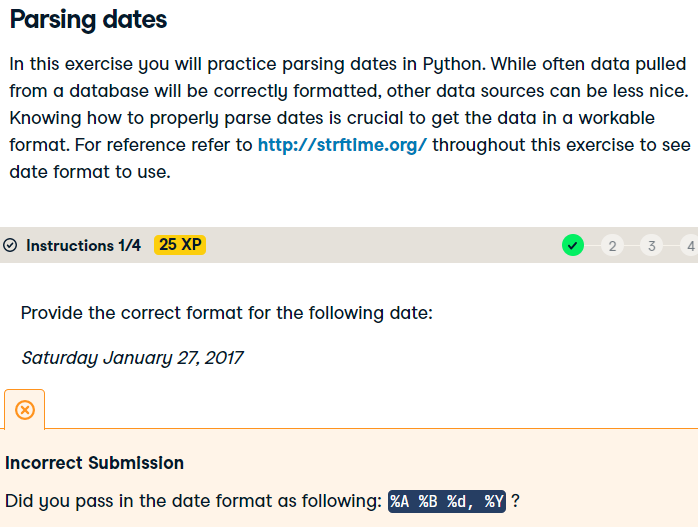

[Python strftime cheatsheet](https://strftime.org/)

In [ ]:
In [1]:
date_data_one
Out[1]:
['Saturday January 27, 2017', 'Saturday December 2, 2017']

In [ ]:
# Provide the correct format for the date
date_data_one = pd.to_datetime(date_data_one, format="%A %B %d, %Y")
print(date_data_one)

<script.py> output:
    DatetimeIndex(['2017-01-27', '2017-12-02'], dtype='datetime64[ns]', freq=None)

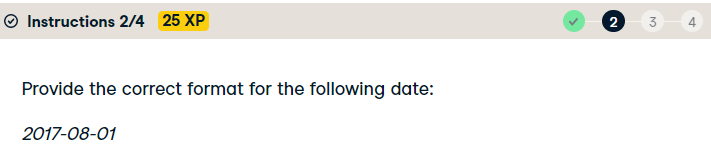

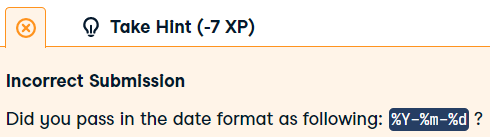

In [ ]:
In [2]:
date_data_two
Out[2]:
['2017-01-01', '2016-05-03']

In [ ]:
# Provide the correct format for the date
date_data_two = pd.to_datetime(date_data_two, format="%Y-%m-%d")
print(date_data_two)

<script.py> output:
    DatetimeIndex(['2017-01-01', '2016-05-03'], dtype='datetime64[ns]', freq=None)

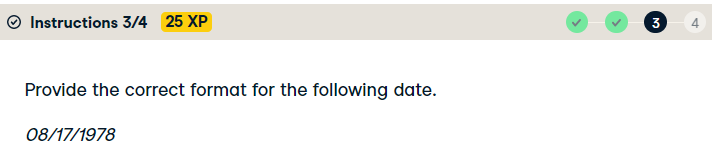

In [ ]:
In [3]:
date_data_three
Out[3]:
['08/17/1978', '01/07/1976']

In [ ]:
# Provide the correct format for the date
date_data_three = pd.to_datetime(date_data_three, format="%m/%d/%Y")
print(date_data_three)

<script.py> output:
    DatetimeIndex(['1978-08-17', '1976-01-07'], dtype='datetime64[ns]', freq=None)

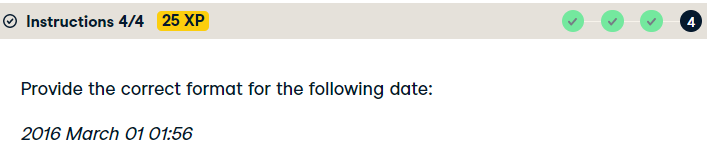

In [ ]:
In [4]:
date_data_four
Out[4]:
['2016 March 01 01:56', '2016 January 4 02:16']

In [ ]:
# Provide the correct format for the date
date_data_four = pd.to_datetime(date_data_four, format="%Y %B %d %H:%M")
print(date_data_four)

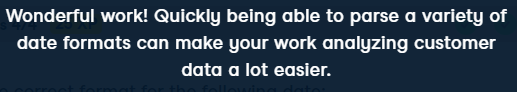

#Creating time series graphs with matplotlib

Got It!
1. Creating time series graphs with matplotlib
Great work on the exercises! Now that we have a familiarity working with date and time values, we will leverage this knowledge to visualize trends in user data.

2. Conversion rate over time
Earlier we looked at user conversion rates across various cohorts. Now we will take this one step further and look at this value over time.

3. Monitoring the impact of changes
Most companies like ours are constantly making changes, and we may have some conceptualization that these things could help or hurt some of our KPIs. One way to monitor the impact of these changes, and the company health overall is track these metrics over time and evaluate them as we make the changes.

4. Week one conversion rate by day
Let’s return to working with week one conversion rate, looking now at a recently released subscription product from the past year. Repeating what we have done before, we can start by calculating our `sub_time` column as we did at the end of chapter one.

5. Conversion Rate by Day
Next, we can group by the registration date values and then aggregate using our conversion rate function we wrote in chapter one. Looking at our results, we now have the week one conversion rate metric broken out by registration day.

6. Plotting Daily Conversion Rate
The best way to view this daily data is as a graph. In pandas, plotting the values in a dataFrame can be very easy. We can call the `plot()` method on our conversion rate dataFrame passing in the name of our x-axis and our y-axis, in this case our `reg_date` and `sub_time` columns respectively.

7. Plotting Daily Conversion Rate
Finally, we call the show method of the matplotlib library to reveal our graph. Interestingly, there is a dip in conversion rate near the end of December. Perhaps our services are more useful with the stress of the Holidays but these users do not need the service after this period and thus don't subscribe.

8. Trends in different cohorts
Further segmenting time series graphs can make them even more powerful. This can provide insight into whether these changes are impacting all users equally or different cohorts in different ways. For many businesses splitting by country and device are particularly useful as these groups can often have drastically different experiences with a product.

9. Trends across time and user groups
To finish, lets look to see if this holiday dip is occurring across all countries, as this could reasonably not be the case. To plot multiple series, we will need to reformat our data slightly. Here is a set of our data, with the additional grouping of country added. We will use the `pivot_table()` method, to reformat our data.

10. Conversion rate by country
To plot this by country we need the data formatted such that there is a column with the conversion rate for each country, rather than the country value in a column of its own. First, we pass our dataFrame to the pivot_table method. Next we set the `values` field to the column we want as our table values. In this case our conversion rate. Next we pass in the value we want to have as columns in our resulting table, which is the country. Finally, we specify the value we want as our rows as the `index`, which in this case is the `sub_date`. Calling this function and reformatting slightly, we can see our transformed data.

11. Plotting trends in different cohorts
To finish we can call `plot()` on our resulting table. with the x-value as our dates and the y-axis as a list of our countries. The dip appears in all of our countries, though interestingly seems to be slightly more prominent in some countries than in others, though it is hard to tell directly. This graph will be useful for monitoring going forward and investigating this issue further.

12. Let's practice!
Great work, now let’s practice!

#Plotting Time Series Data

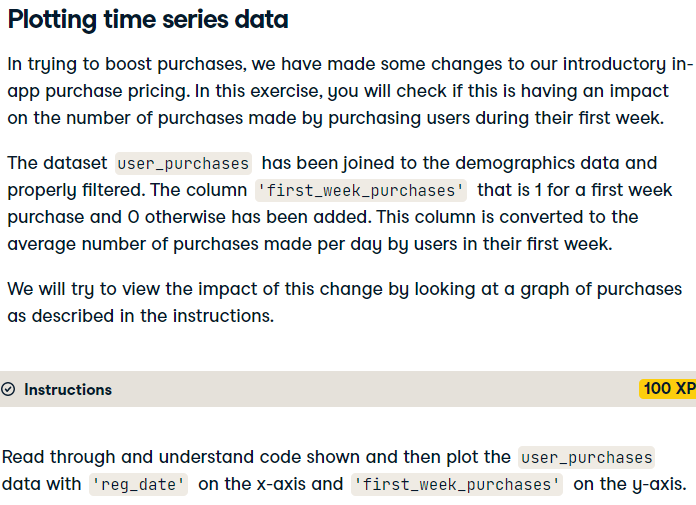

Original dataset is below

In [ ]:
In [2]:
user_purchases.head()
Out[2]:

   Unnamed: 0        date         uid            sku  price  ... device gender country age  first_week_purchases
0           0  2018-03-14  84715271.0    sku_two_299    299  ...    and      M     USA  34                     1
1           1  2018-03-16  84715271.0    sku_two_299    299  ...    and      M     USA  34                     1
2           7  2018-01-14  47315877.0  sku_three_499    499  ...    iOS      F     BRA  15                     1
3           8  2018-01-15  47315877.0    sku_one_199    199  ...    iOS      F     BRA  15                     0
4           9  2018-01-16  47315877.0    sku_two_299    299  ...    iOS      F     BRA  15                     0

[5 rows x 11 columns]

This is the code but I'm going to look at it step by step

In [ ]:
# Group the data and aggregate first_week_purchases
user_purchases = user_purchases.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Plot the results
user_purchases.plot(x=____, y=____)
plt.show()

In [ ]:
# Group the data and aggregate first_week_purchases
user_purchases = user_purchases.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

In [4]:
user_purchases.head()
Out[4]:

                      first_week_purchases
                                       sum
reg_date   uid                            
2017-06-01 14425628.0                    1
           33027560.0                    0
           39880095.0                    2
           46080210.0                    1
           48166079.0                    0

In [ ]:
# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

In [5]:
user_purchases.head()
Out[5]:

     reg_date         uid  first_week_purchases
0  2017-06-01  14425628.0                     1
1  2017-06-01  33027560.0                     0
2  2017-06-01  39880095.0                     2
3  2017-06-01  46080210.0                     1
4  2017-06-01  48166079.0                     0

In [ ]:
# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
In [5]:
user_purchases.head()
Out[5]:

           first_week_purchases
                           mean
reg_date                       
2017-06-01             0.846154
2017-06-02             1.333333
2017-06-03             1.352941
2017-06-04             1.727273
2017-06-05             1.666667

In [ ]:
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)
In [5]:
user_purchases.head()
Out[5]:

     reg_date  first_week_purchases
0  2017-06-01              0.846154
1  2017-06-02              1.333333
2  2017-06-03              1.352941
3  2017-06-04              1.727273
4  2017-06-05              1.666667

In [ ]:
# Group the data and aggregate first_week_purchases
user_purchases = user_purchases.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Plot the results
user_purchases.plot(x='reg_date', y='first_week_purchases')
plt.show()

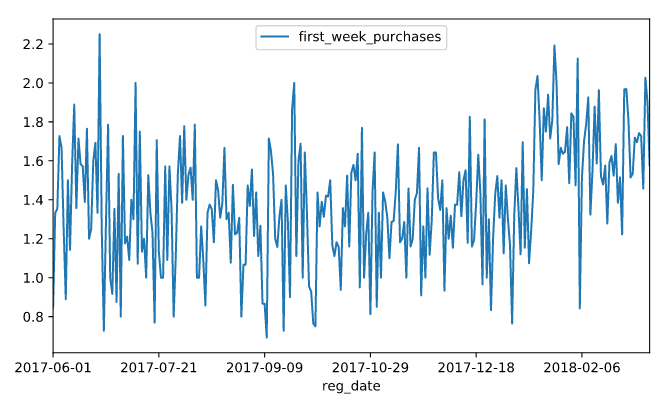

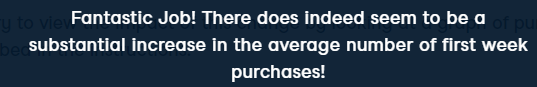

#Pivoting Our Data

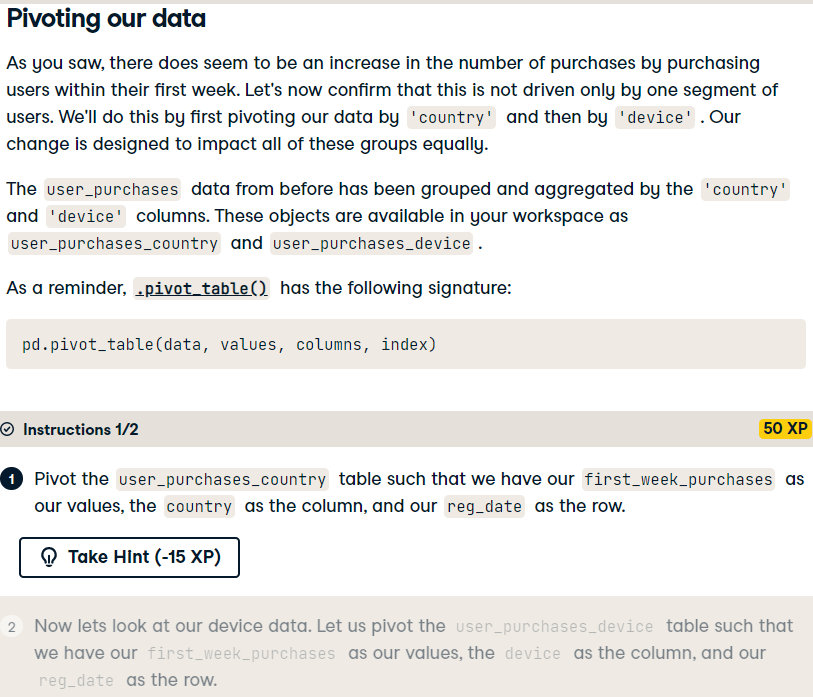

In [ ]:
In [1]:
user_purchases.head()
Out[1]:

   Unnamed: 0    reg_date country device         uid  first_week_purchases
0           0  2017-06-01     BRA    and  63586909.0                     1
1           1  2017-06-01     BRA    iOS  39880095.0                     2
2           2  2017-06-01     DEU    iOS  72740912.0                     1
3           3  2017-06-01     FRA    and  50206175.0                     0
4           4  2017-06-01     FRA    iOS  99876512.0                     0
In [2]:
user_purchases_country.head()
Out[2]:

     reg_date country  first_week_purchases
0  2017-06-01     BRA              1.500000
1  2017-06-01     DEU              1.000000
2  2017-06-01     FRA              0.000000
3  2017-06-01     TUR              0.333333
4  2017-06-01     USA              1.200000

In [ ]:
# Pivot the data
country_pivot = pd.pivot_table(user_purchases_country, values=['first_week_purchases'], columns=['country'], index=['reg_date'])
print(country_pivot.head())

<script.py> output:
               first_week_purchases                                             
    country                     BRA  CAN       DEU       FRA       TUR       USA
    reg_date                                                                    
    2017-06-01             1.500000  NaN  1.000000  0.000000  0.333333  1.200000
    2017-06-02             2.000000  NaN  0.500000       NaN  1.000000  1.428571
    2017-06-03             1.000000  2.0  1.500000  1.333333  3.000000  1.200000
    2017-06-04             4.000000  NaN  1.333333  4.000000       NaN  1.166667
    2017-06-05             1.666667  NaN       NaN       NaN  2.000000  1.000000

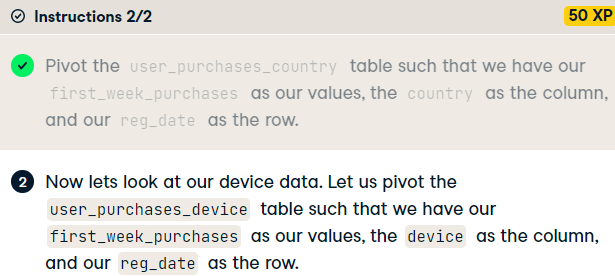

In [ ]:
# Pivot the data
device_pivot = pd.pivot_table(user_purchases_device, values=['first_week_purchases'], columns=['device'], index=['reg_date'])
print(device_pivot.head())

<script.py> output:
               first_week_purchases          
    device                      and       iOS
    reg_date                                 
    2017-06-01             0.714286  1.000000
    2017-06-02             1.400000  1.285714
    2017-06-03             1.545455  1.000000
    2017-06-04             1.600000  1.833333
    2017-06-05             1.625000  2.000000

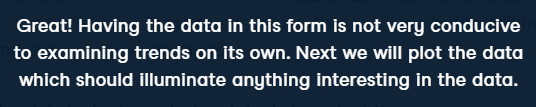

#Examining the Different Cohorts

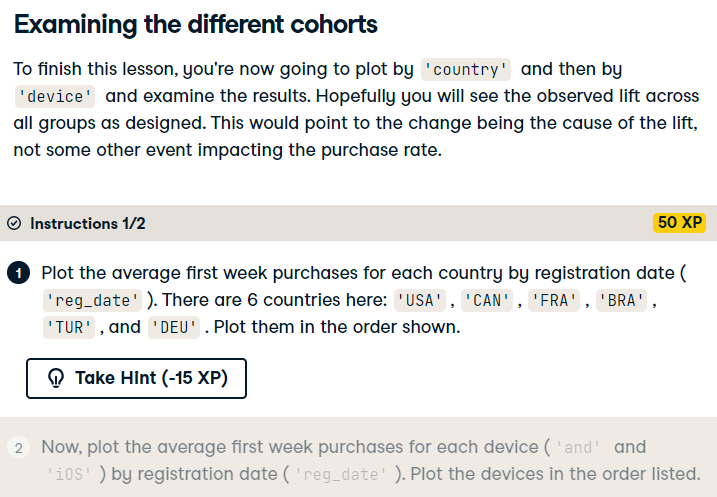

In [ ]:
In [1]:
country_pivot.head()
Out[1]:

   Unnamed: 0    reg_date       BRA  CAN       DEU       FRA       TUR       USA
0           0  2017-06-01  1.500000  NaN  1.000000  0.000000  0.333333  1.200000
1           1  2017-06-02  2.000000  NaN  0.500000       NaN  1.000000  1.428571
2           2  2017-06-03  1.000000  2.0  1.500000  1.333333  3.000000  1.200000
3           3  2017-06-04  4.000000  NaN  1.333333  4.000000       NaN  1.166667
4           4  2017-06-05  1.666667  NaN       NaN       NaN  2.000000  1.000000

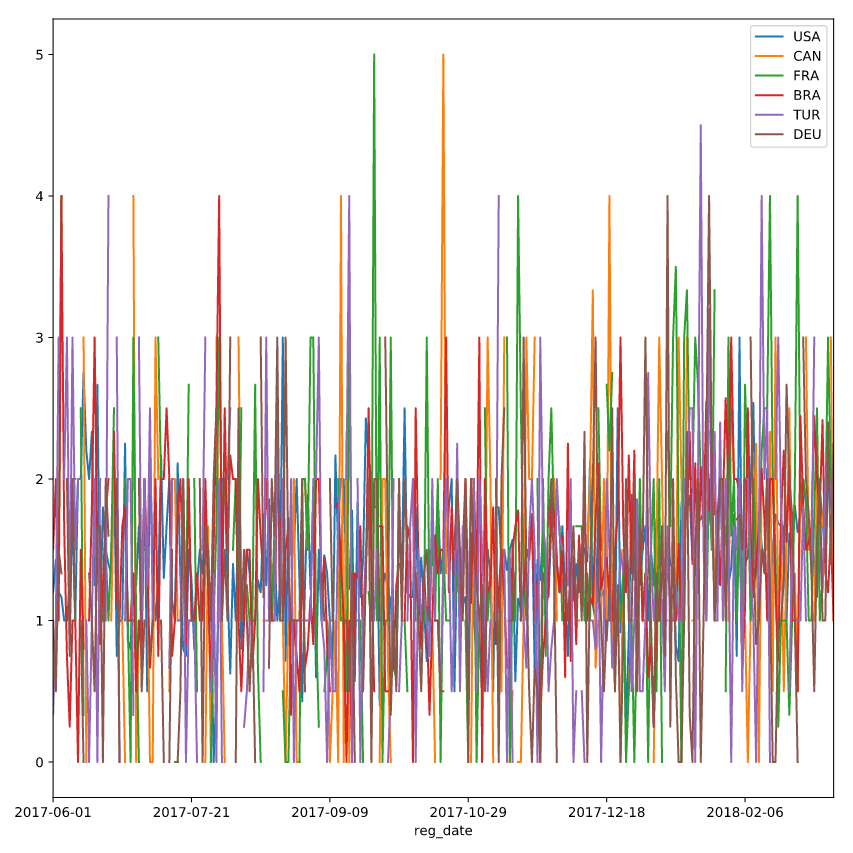

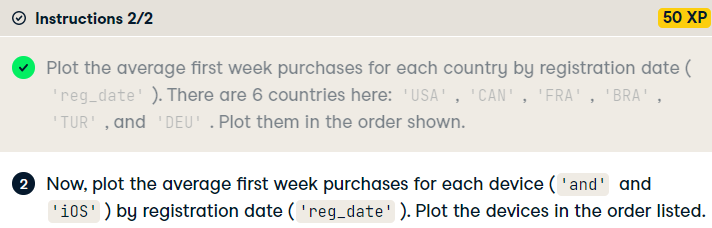

In [ ]:
In [3]:
device_pivot.head()
Out[3]:

   Unnamed: 0    reg_date       and       iOS
0           0  2017-06-01  0.714286  1.000000
1           1  2017-06-02  1.400000  1.285714
2           2  2017-06-03  1.545455  1.000000
3           3  2017-06-04  1.600000  1.833333
4           4  2017-06-05  1.625000  2.000000

In [ ]:
# Plot the average first week purchases for each device by registration date
device_pivot.plot(x='reg_date', y=['and', 'iOS'])
plt.show()

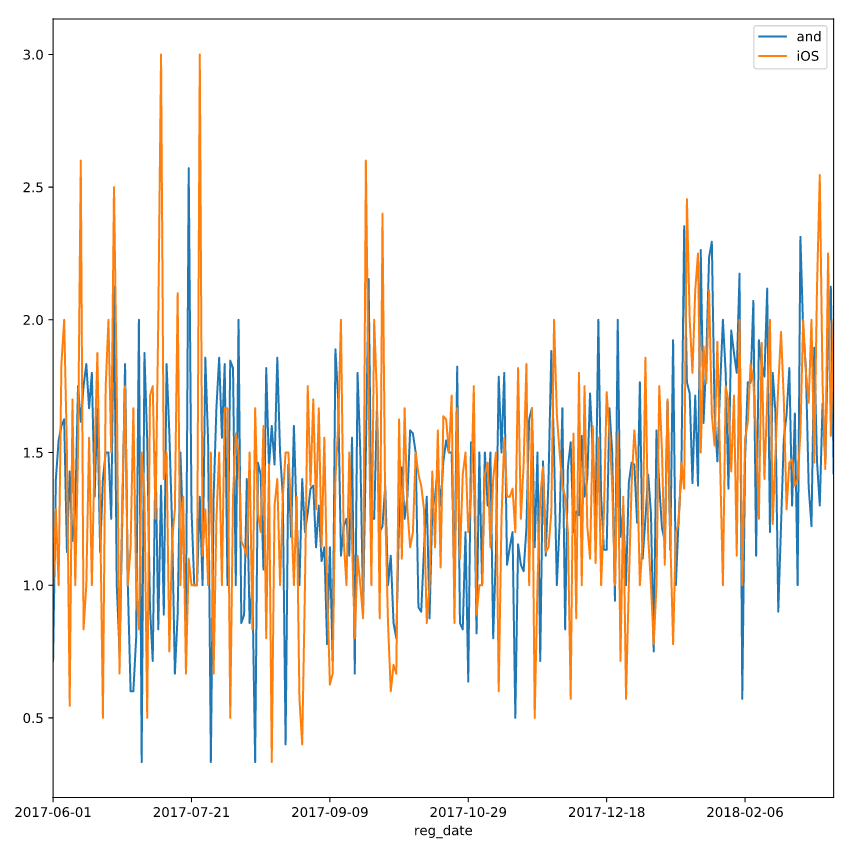

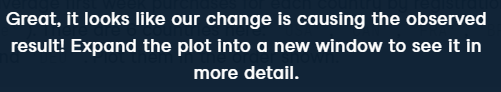

# Understanding and visualizing trends

Got It!
1. Understanding and visualizing trends in customer data
Awesome work, examining plots in this way can be a tremendous way to understand trends in user behavior!

2. Further techniques for uncovering trends
Often, plotting a graph is not enough and additional preprocessing is required to uncover the trend. Here we will consider two of these processing techniques and explore how they are useful.

3. Subscribers Per Day
To start, let’s look at the USA subscribers-per-day number for a new product without a trial period. Here we have a dataset of subscribers broken out by registration and subscription date. For a given day we will look at the number of subscribers who registered within the prior week. To do this we find the difference between registration and subscription dates. Then filter on this value, and finally group and aggregate by subscription date.

4. Weekly seasonality and our pricing change
There seems to be weekly seasonality. As evidenced by the peaks-and-valleys roughly every 7 days. Perhaps users are more likely to buy when they are using the app more heavily on the weekends than during the middle of the week Many metrics will have seasonality and it can easily obfuscate macro-level-trends in the data. Specifically, we have reason to be concerned that a recent pricing change is causing a dip in subscription volume. It might be hard to tell if the data has a high degree of seasonal movement as we see here.

5. Correcting for seasonality with trailing averages
We can correct for this movement, by calculating a trailing average over our data. A trailing average is a smoothing technique that sets the value for a given day as the average over the past n-days. To smooth weekly seasonality we want n-equals-seven. This has the effect of averaging over a week such that every day is pulled towards the weekly level limiting the day level effects.

6. Calculating Trailing Averages
First, we use the pandas `rolling()` method to find the rolling window. The primary parameters of `rolling()` are `window` which is our n value from above, and `center` which is a Boolean. If this is true then our averaged value will be placed at the middle of our window, if not it will be placed in the index that we are looking back from, which is what we want.

7. Smoothing our USA subscription data
Once we have this we call `mean` to find our average over the window. We can calculate this and store it in an additional variable As we can see, this smoothing does a lot to flatten out our line and reveal the dip, unobscured.

8. Noisy data - Highest SKU purchases by date
Beyond seasonality, data can simply be noisy. Let’s take a look at a graph of how many of our largest sku in-app-items are purchased per day. It is incredibly noisy, as the values vary widely from day-to-day. We can apply an exponential moving average so we can check if any macro trends are hidden among this noise.

9. Smoothing with an exponential moving average
This type of average weights the points such that the earlier ones are weighted less than the more recent ones within our window. This pulls our data back to any central trend, while maintaining any recent movements.

10. Smoothed purchases by date
We can use the `ewm()` method to find these weighted windows. To do this we specify the `span` argument to be our window size. Then we find the average of this weighted data. Here we apply this to our set of purchase data, using a 30-day window. Determining windows like this can require prior knowledge of the structure of the data or some trial-and-error. See that this does remove a lot of the noise and reveals a slight upward trend.

11. Summary - Data Smoothing Techniques
These techniques are very useful for uncovering trends. Next we will put them to use diving deeper into user data.

12. Let's practice!
Good luck, now let’s practice!

#Seasonality and Moving Averages

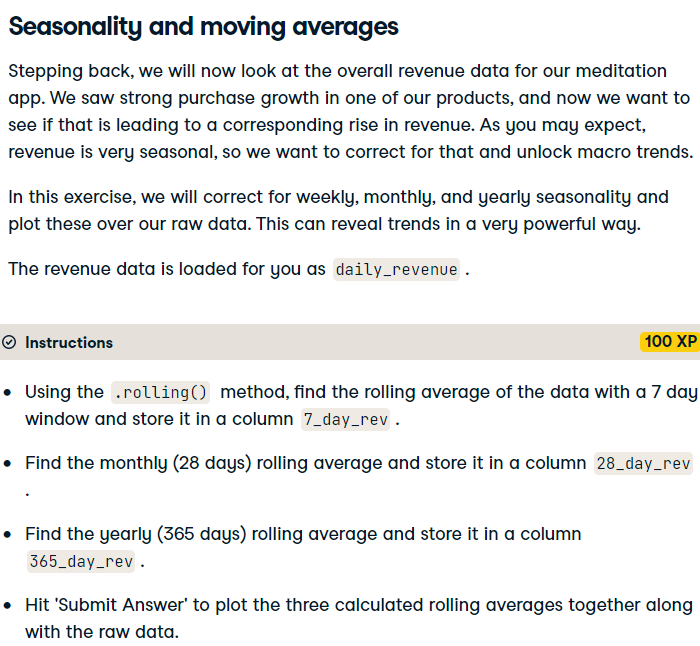

In [ ]:
n [2]:
daily_revenue.head()
Out[2]:

                       date    revenue
0 2013-09-20 00:00:00+00:00  1040405.0
1 2013-09-21 00:00:00+00:00   998827.0
2 2013-09-22 00:00:00+00:00   950908.0
3 2013-09-23 00:00:00+00:00   890947.0
4 2013-09-24 00:00:00+00:00   942562.0

In [ ]:
# Compute 7_day_rev
daily_revenue['7_day_rev'] = daily_revenue.revenue.rolling(window=7,center=False).mean()

# Compute 28_day_rev
daily_revenue['28_day_rev'] = daily_revenue.revenue.rolling(window=28,center=False).mean()
    
# Compute 365_day_rev
daily_revenue['365_day_rev'] = daily_revenue.revenue.rolling(window=365,center=False).mean()
    
# Plot date, and revenue, along with the 3 rolling functions (in order)    
daily_revenue.plot(x='date', y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev', ])
plt.show()

In [3]:
daily_revenue.head()
Out[3]:

                       date    revenue  7_day_rev  28_day_rev  365_day_rev
0 2013-09-20 00:00:00+00:00  1040405.0        NaN         NaN          NaN
1 2013-09-21 00:00:00+00:00   998827.0        NaN         NaN          NaN
2 2013-09-22 00:00:00+00:00   950908.0        NaN         NaN          NaN
3 2013-09-23 00:00:00+00:00   890947.0        NaN         NaN          NaN
4 2013-09-24 00:00:00+00:00   942562.0        NaN         NaN          NaN

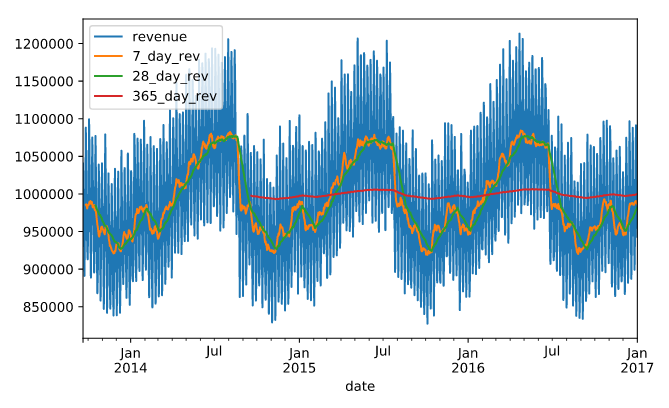

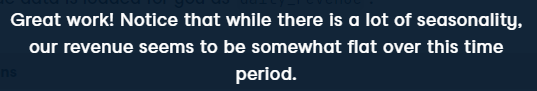

# Exponential rolling average & over/under smoothing

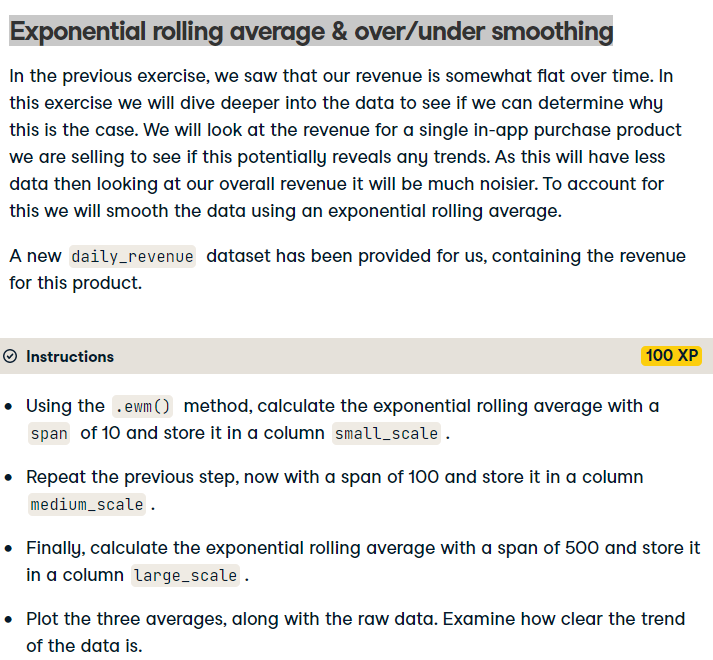

In [ ]:
In [2]:
daily_revenue.head()
Out[2]:

                       date    revenue
0 2013-09-20 00:00:00+00:00  1034094.0
1 2013-09-21 00:00:00+00:00  1016165.0
2 2013-09-22 00:00:00+00:00   938718.0
3 2013-09-23 00:00:00+00:00   898469.0
4 2013-09-24 00:00:00+00:00   951240.0

In [ ]:
# Calculate 'small_scale'
daily_revenue['small_scale'] = daily_revenue.revenue.ewm(span=10).mean()

# Calculate 'medium_scale'
daily_revenue['medium_scale'] = daily_revenue.revenue.ewm(span=100).mean()

# Calculate 'large_scale'
daily_revenue['large_scale'] = daily_revenue.revenue.ewm(span=500).mean()
In [3]:
daily_revenue.head()
Out[3]:

                       date    revenue   small_scale  medium_scale   large_scale
0 2013-09-20 00:00:00+00:00  1034094.0  1.034094e+06  1.034094e+06  1.034094e+06
1 2013-09-21 00:00:00+00:00  1016165.0  1.024233e+06  1.025040e+06  1.025112e+06
2 2013-09-22 00:00:00+00:00   938718.0  9.898566e+05  9.956885e+05  9.961984e+05
3 2013-09-23 00:00:00+00:00   898469.0  9.597484e+05  9.706497e+05  9.716193e+05
4 2013-09-24 00:00:00+00:00   951240.0  9.573059e+05  9.666109e+05  9.675108e+05

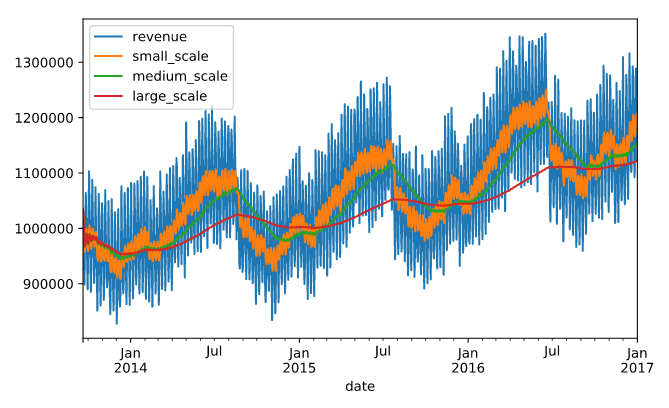

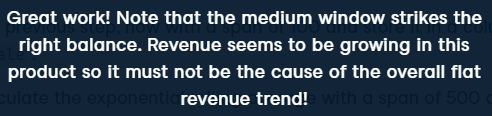

# Events and releases

1. Events and releases
Great work on the exercises! You have a real mastery of the tools used for evaluating trends in user data. These skills are highly transferable to any scenario with customer data.

2. Exploratory analysis - issues in our ecosystem
Now, we will build on these skills and apply them to discover the cause of an issue in our app ecosystem.

3. Visualizing the drop in conversion rate (3 Years)
Over the course of our monitoring we have noticed a concerning dip in new user retention. Calculating this metric & plotting the data as we have done before reveals how alarming this trend is. We want to try to investigate what is causing this, and determine if it is something we can solve?

4. Visualizing the drop in conversion rate (6 Months)
First we filter to dates between the current date, and 6 months prior. Next we execute the same steps we saw before, to plot the results. First, let us limit our graph so that we are not looking at 3 years of data, but only the most recent 6 months. This will give us the resolution to notice subtler changes. Wow! It seems that our drop happened right around the end of February or beginning of March.

5. Investigating the conversion rate drop
One revealing factor would be if this trend has impacted one group of users and not others. This could point to a specific change or event being the cause. The two biggest segmentors of our user base are country and device as each defines a somewhat independent ecosystem.

6. Splitting our data by country and device
As we have done before let us segment by country. Then by device.

7. Breaking out by Country
Looking by country, we see that while each country is experiencing a drop during that time, it is certainly most pronounced in Brazil and Turkey. Interestingly we know that these are our two most android heavy countries where we have a user presence.

8. Breaking out by Device
Looking by device confirms the hypothesis we were forming. The dip is only manifesting itself on android devices. At this point we have really honed in on what the issue might be. A final step is to see if any changes or events occurred that may be relating to this issue.

9. Annotating datasets
Here we have two datasets, events dot csv and releases dot csv which contain the date and type of the event or release. Events primarily includes holidays, and releases includes both android and ios software releases.

10. Plotting annotations - events
We can plot these dates overlaid on our graph of data broken out by device. First we must iterate through the rows in our annotation DataFrames. This syntax of iteration should be familiar to you. Then for each row, we generate a line to plot with plt dot avline which creates a vertical line at the x-value, we pass in. In this case our date, as well as a color and line type to use.

11. Plotting annotations - releases
We can repeat the same plotting with the release annotations. Here we can additionally check whether the release is on iOS or android, and specify a different line color in each case to make our graph clearer. Then we can call plot, after plotting our time graphs, to show the annotations overlaid.

12. Annotated conversion rate graphs
Looking at this graph, it is clear that we had an android release on or around the day of our dip starting. Now all that is to find out what in that release might be impacting the new user experience.

13. Power and limitations of exploratory analysis
While this is a simple case, it shows the power of visualizing data to uncover trends. Note that this can only take you so far. It can reveal obvious potential relationships but cannot allow for the scientific testing of different ideas or show causation. That is where exploratory data analysis ends and A/B testing begins.

14. Let's practice!
Now, let’s practice!

# Visualizing user spending

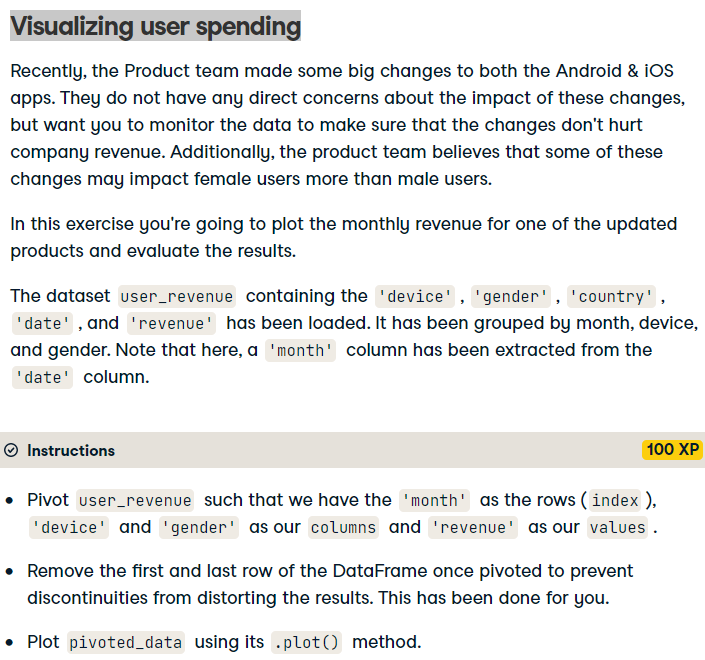

In [ ]:
In [1]:
user_revenue.head()
Out[1]:

       month  gender   device    revenue
0 2013-09-01  female  android  1144057.0
1 2013-09-01  female      ios  1543801.0
2 2013-09-01    male  android  3447967.0
3 2013-09-01    male      ios  4631978.0
4 2013-10-01  female  android  3233420.0

In [ ]:
# Pivot user_revenue
pivoted_data = pd.pivot_table(user_revenue, values ='revenue', columns=['device', 'gender'], index='month')
In [2]:
pivoted_data.head()
Out[2]:

device        android                   ios            
gender         female       male     female        male
month                                                  
2013-09-01  1144057.0  3447967.0  1543801.0   4631978.0
2013-10-01  3233420.0  9685265.0  4345341.0  12834918.0
2013-11-01  3004144.0  9039521.0  4024076.0  12100260.0
2013-12-01  3088622.0  9286559.0  4180127.0  12387151.0
2014-01-01  3250236.0  9738726.0  4298364.0  12994040.0

In [ ]:
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]
In [3]:
pivoted_data.head()
Out[3]:

device        android                   ios            
gender         female       male     female        male
month                                                  
2013-10-01  3233420.0  9685265.0  4345341.0  12834918.0
2013-11-01  3004144.0  9039521.0  4024076.0  12100260.0
2013-12-01  3088622.0  9286559.0  4180127.0  12387151.0
2014-01-01  3250236.0  9738726.0  4298364.0  12994040.0
2014-02-01  2851799.0  8591749.0  3809036.0  11505767.0

I'm trying to understand the code above

In [ ]:
In [3]:
pivoted_data[0:]
Out[3]:

device        android                    ios            
gender         female        male     female        male
month                                                   
2013-10-01  3233420.0   9685265.0  4345341.0  12834918.0
2013-11-01  3004144.0   9039521.0  4024076.0  12100260.0
2013-12-01  3088622.0   9286559.0  4180127.0  12387151.0
2014-01-01  3250236.0   9738726.0  4298364.0  12994040.0
2014-02-01  2851799.0   8591749.0  3809036.0  11505767.0

In [4]:
pivoted_data[1:]
Out[4]:

device        android                    ios            
gender         female        male     female        male
month                                                   
2013-12-01  3088622.0   9286559.0  4180127.0  12387151.0
2014-01-01  3250236.0   9738726.0  4298364.0  12994040.0
2014-02-01  2851799.0   8591749.0  3809036.0  11505767.0
2014-03-01  3241519.0   9674430.0  4293569.0  12908831.0
2014-04-01  3273928.0   9689798.0  4366293.0  12960457.0

In [5]:
len(pivoted_data)
Out[5]:
37

In [ ]:
# Pivot user_revenue
pivoted_data = pd.pivot_table(user_revenue, values ='revenue', columns=['device', 'gender'], index='month')
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]

# Create and show the plot
pivoted_data.plot()
plt.show()

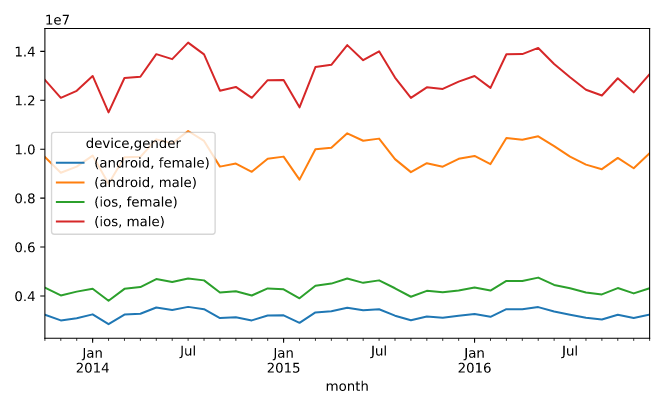

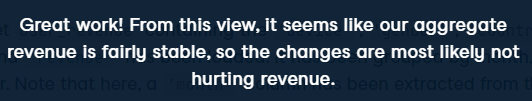

# Looking more closely at revenue


In revenue data, there tends to be a high level of seasonality. This is demonstrated in the graph on the right, which looks more closely at revenue, incorporating seasonality while also breaking down revenue by gender and device.

Take a look at the graph. Which of group of users spends the least?

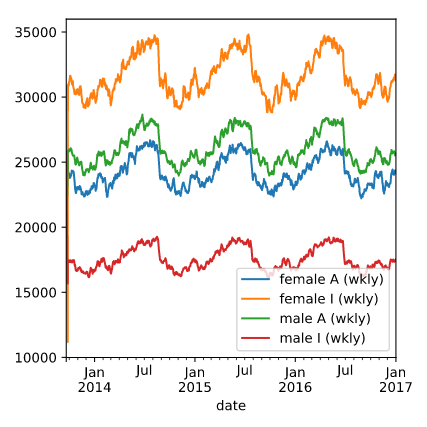

1. Female Android users.
  - Incorrect

2. Male iPhone users.
  - Correct

3. Female iPhone users.
  - Incorrect. Female iPhone users actually spend the most!

4. Male Android users.
  - Incorrect